In [118]:
import pandas as pd

df= pd.read_csv('/content/Mall_Customers.csv')
df.head(8)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [119]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [120]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [121]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [122]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


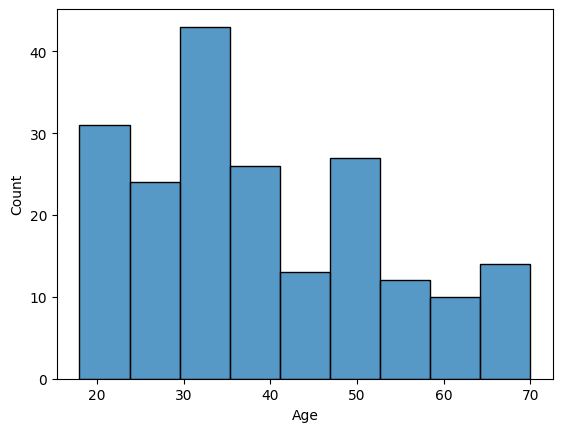

<Figure size 800x500 with 0 Axes>

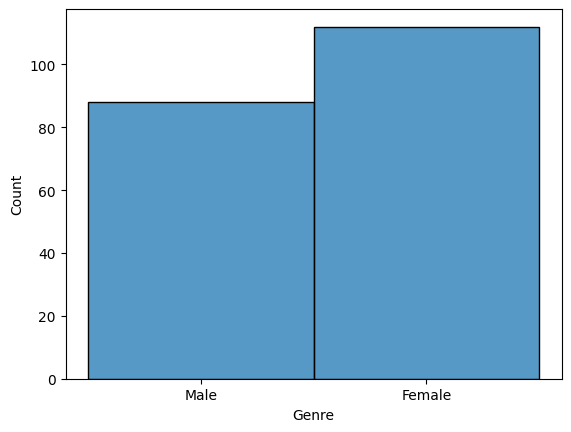

<Figure size 800x500 with 0 Axes>

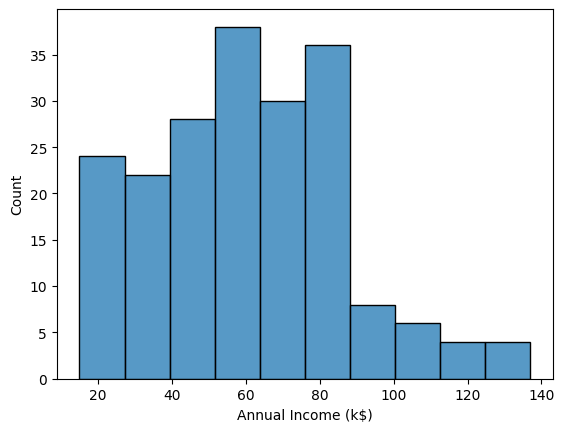

<Figure size 800x500 with 0 Axes>

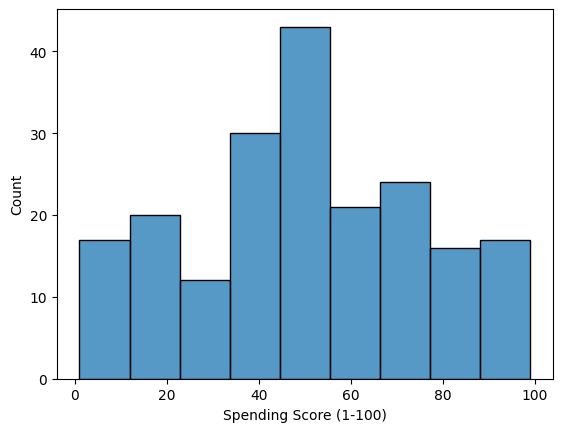

<Figure size 800x500 with 0 Axes>

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.figure(figsize=(8,5))
plt.show()

sns.histplot(df['Genre'])
plt.figure(figsize=(8,5))
plt.show()

sns.histplot(df['Annual Income (k$)'])
plt.figure(figsize=(8,5))
plt.show()

sns.histplot(df['Spending Score (1-100)'])
plt.figure(figsize=(8,5))
plt.show()

In [124]:
#preprocessing
#convert Genre to numeric

# Make sure everything is string first
df['Genre'] = df['Genre'].astype(str)
# Strip whitespace, remove quotes, lower case
df['Genre'] = df['Genre'].str.strip().str.replace('"', '').str.lower()

# Now print again to confirm
print("Cleaned values:", df['Genre'].unique())

Cleaned values: ['male' 'female']


In [125]:
# Now map
df['Genre'] = df['Genre'].map({'male': 0, 'female': 1})

# Check result
print("Mapped values:", df['Genre'].unique())

Mapped values: [0 1]


In [126]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [127]:
#select features

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

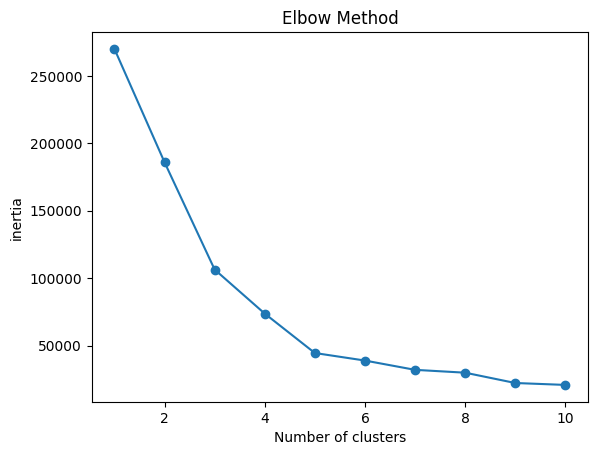

In [111]:
#k-means clustering
#1 Elbow method to determine optimal number of clusters

from sklearn.cluster import KMeans
inertia=[]
for K in range(1,11):
  kmeans=KMeans(n_clusters=K,random_state=0)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


In [128]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

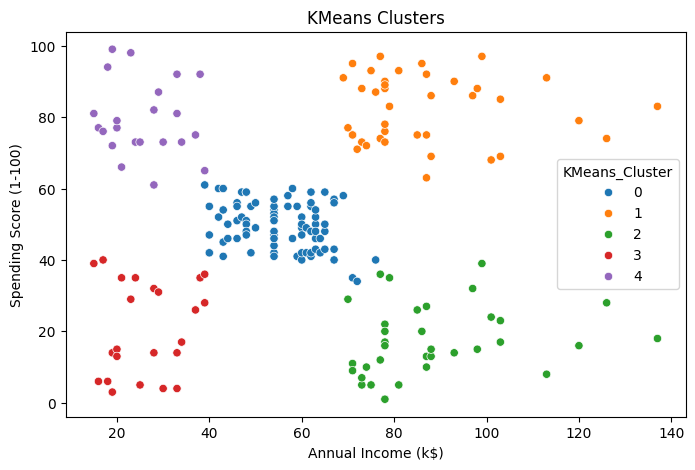

,KMeans_Cluster,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.59,42.72,55.30,49.52
1,1,0.54,32.69,86.54,82.13
2,2,0.46,41.11,88.20,17.11
3,3,0.61,45.22,26.30,20.91
4,4,0.59,25.27,25.73,79.36


In [130]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='tab10', data=df)
plt.title('KMeans Clusters')
plt.show()

# Cluster summary without PCA
cluster_summary_original = df.groupby('KMeans_Cluster')[features].mean().round(2)
cluster_summary_original.reset_index(inplace=True)
cluster_summary_original